In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as smp
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [57]:
t, g, l1, l2,l3,l4, m1, m2, mb, hp = smp.symbols('t g l_1 l_2 l_3 l_4 m_1 m_2 m_b h_p')
theta, phi, psi = smp.symbols(r'\theta \phi \psi', cls=smp.Function)

In [58]:
theta = theta(t)
phi = phi(t)
psi = psi(t)
theta_d = smp.diff(theta, t)
theta_dd = smp.diff(theta_d, t)
phi_d = smp.diff(phi, t)
phi_dd = smp.diff(phi_d, t)
psi_d = smp.diff(psi, t)
psi_dd = smp.diff(psi_d, t)

In [10]:
L = smp.Rational(1,2) * m1 * ((l2**2*phi_d**2)+(l3**2*psi_d**2)+2*phi_d*psi_d*l2*l3*smp.sin(psi-phi))\
+ smp.Rational(1,2) * m2 * ((l1**2*phi_d**2)+(l4**2*theta_d**2)+2*phi_d*theta_d*l1*l4*smp.cos(phi+theta))\
+ smp.Rational(1,2)*phi_d**2*mb*(((l1+l2)/2-l2)**2+(l1+l2)**2/12)\
-m1*g*(l2*smp.sin(phi)-l3*smp.cos(psi))-m2*g*(-l1*smp.sin(phi)-l4*smp.sin(theta))+mb*g*(l1/2-l2/2)*smp.sin(phi)

In [11]:
L

-g*m_1*(l_2*sin(\phi(t)) - l_3*cos(\psi(t))) - g*m_2*(-l_1*sin(\phi(t)) - l_4*sin(\theta(t))) + g*m_b*(l_1/2 - l_2/2)*sin(\phi(t)) + m_1*(l_2**2*Derivative(\phi(t), t)**2 - 2*l_2*l_3*sin(\phi(t) - \psi(t))*Derivative(\phi(t), t)*Derivative(\psi(t), t) + l_3**2*Derivative(\psi(t), t)**2)/2 + m_2*(l_1**2*Derivative(\phi(t), t)**2 + 2*l_1*l_4*cos(\phi(t) + \theta(t))*Derivative(\phi(t), t)*Derivative(\theta(t), t) + l_4**2*Derivative(\theta(t), t)**2)/2 + m_b*((l_1/2 - l_2/2)**2 + (l_1 + l_2)**2/12)*Derivative(\phi(t), t)**2/2

Euler Lagrange Equations

In [59]:
LE1 = smp.diff(L, theta) - smp.diff(smp.diff(L, theta_d), t).simplify()
LE2 = smp.diff(L, phi) - smp.diff(smp.diff(L, phi_d), t).simplify()
LE3 = smp.diff(L, psi) - smp.diff(smp.diff(L, psi_d), t).simplify()

In [60]:
sols = smp.solve([LE1, LE2, LE3], (theta_dd, phi_dd, psi_dd),
                simplify=False, rational=False)

In [61]:
dz1dt_f = smp.lambdify((t, g, l1, l2,l3,l4, m1, m2, mb, hp, theta, phi, psi, theta_d, phi_d, psi_d), sols[theta_dd])
dz2dt_f = smp.lambdify((t, g, l1, l2,l3,l4, m1, m2, mb, hp, theta, phi, psi, theta_d, phi_d, psi_d), sols[phi_dd])
dz3dt_f = smp.lambdify((t, g, l1, l2,l3,l4, m1, m2, mb, hp, theta, phi, psi, theta_d, phi_d, psi_d), sols[psi_dd])
dthetadt_f = smp.lambdify(theta_d, theta_d)
dphidt_f = smp.lambdify(phi_d, phi_d)
dpsidt_f = smp.lambdify(psi_d, psi_d)

In [62]:
def dSdt(S, t, g, l1, l2,l3,l4, m1, m2, mb, hp):
    theta, z1, phi, z2, psi, z3 = S
    return [
        dthetadt_f(z1),
        dz1dt_f(t, g, l1, l2,l3,l4, m1, m2, mb, hp, theta, phi, psi, z1,z2,z3),
        dphidt_f(z2),
        dz2dt_f(t, g, l1, l2,l3,l4, m1, m2, mb, hp, theta, phi, psi, z1,z2,z3),
        dpsidt_f(z3),
        dz3dt_f(t, g, l1, l2,l3,l4, m1, m2, mb, hp, theta, phi, psi, z1,z2,z3),
    ]

In [84]:
t = np.linspace(0, 30, 1001) # s
#should it be -9.81
g = 9.81 #m/s^2
m1=1000 # kg
m2=1 # kg
mb=49500 # kg
l1 = 30 # m
l2 = 3 # m
l3 = 2 # m
l4 = 2 # m
hp = 22 # m
#y0 = [theta0, theta0dot, phi0, phi0dot, psi0, pdi0dot]
#why are his 1's and -1's
ans = odeint(dSdt, y0=[0, 0, np.pi/4 , 0, 0,0], t=t, args=( g, l1, l2,l3,l4, m1, m2, mb, hp))

In [90]:
#here 0 is theta, 2 is phi,4 is psi
theta = ans.T[0]
phi = ans.T[2]
psi = ans.T[4]
theta_dot = ans.T[1]

Text(0, 0.5, 'Angle (radians)')

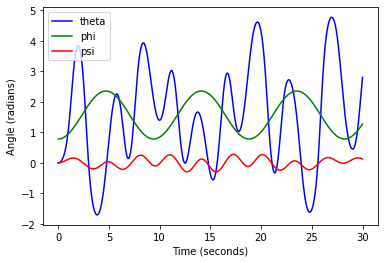

In [91]:
plt.plot(t, theta, "-b", label = "theta")
plt.plot(t, phi, "-g", label = "phi")
plt.plot(t, psi, "-r", label = "psi")
plt.legend(loc="upper left")
plt.xlabel('Time (seconds)')
plt.ylabel('Angle (radians)')

# Note trebuchet will only fire once, this assumes it can just keep spinning so only want range in which phi goes from 45 to -90 

Text(0, 0.5, 'Speed (rad/s)')

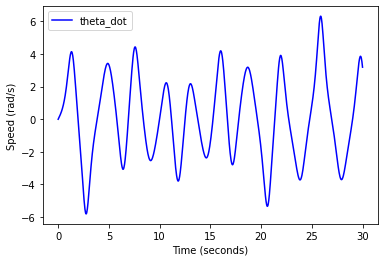

In [92]:
plt.plot(t, theta_dot, "-b", label = "theta_dot")
plt.legend(loc="upper left")
plt.xlabel('Time (seconds)')
plt.ylabel('Speed (rad/s)')

In [ ]:
# need to find at what time the speed is at a maximum